**20230716** This space will be dedicated to experimenting and exploring in probability and statistics. The goal is to work more often in these Jupyter notebooks so that I can get used to directly experimenting in code rather than simply reasoning through things and recording arguments in LaTeX. We can record arguments here but also include graphs and numerical simulations.

## Coin flipping experiments 

I want to start with some simple coin flipping experiments. We will begin by doing this with the random module.

In [1]:
import random
import math
import numpy as np

The first thing I want is a function that will allow me to run an experiment with a prescribed # $N$ of coin tosses. I would like the output of this function to be a list which is the result of the experiment and which is a sequence of 1s and 0s generated randomly among all such sequences of length $N.$ It would be great if this function had as an optional argument the probability $p$ of heads, which would default to $p=1/2.$

It turns out this function exists within the numpy module as binomial(number of trials, success probability, size of experiment).

In [2]:
rng = np.random.default_rng()

n=15 #number of tosses per trial
p=0.7 #probability of success for a toss
N=100000 #of trials in experiment

In [3]:
experiment = rng.binomial(n,p,N)
sum(experiment==1)

0

We're not using the full power of these Jupyter notebooks until we are plotting graphs, so what I'd like to do next is plot a few histograms to get comfortable with what is required. Let's start with a histogram of the binomial distribution. We will bucket the # of successes per trial across the experiment.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


<Axes: ylabel='Frequency'>

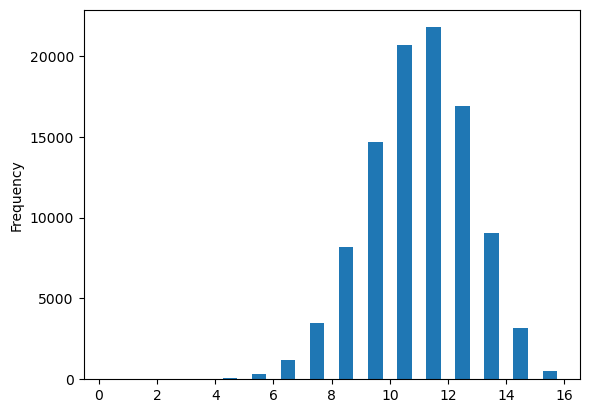

In [4]:
import pandas as pd

listOfBins = []
for i in range(n+2):
    listOfBins.append(i)

print(listOfBins)

E = pd.Series(experiment)
E.plot.hist(bins = listOfBins,rwidth=0.5)

One thing I've not figured out how to do in the pandas histogram is label each bin. I found we can prescribe the bins as a list but we need to include one greater than the maximum bin in order to capture the most successful trials.

Here's something else interesting that we can do in python that we could not do in my ordinary LaTeX writing: compare the theoretical values with simulated values. Above we have a visualization of the simulated values. Now let's see what are the theoretical values of this histogram.

The binomial probability of $k$ successes in $10$ trials is ${10 \choose k} p^k(1-p)^{10-k}$ for $k=0,\dots,10.$ Let's use the math module to create a list of these probabilities and then plot that in a bar chart. Let's start by computing a single entry of the list of probabilities.

In [5]:
print(math.comb(n,math.ceil(p*n))*math.pow(p,math.ceil(p*n))*math.pow(1-p,n-math.ceil(p*n)))
print(sum(experiment==math.ceil(p*n)))

0.21862313133979497
21765


Now let's create the full list. We need to create a dictionary in which the keys are $k=0,\dots,10$ and the values for these keys are ${10\choose k} p^k(1-p)^{10-k}.$ We should like to make this dynamic in the sense that $p$ can be prescribed. We may also wish to make the number of trials (currently $10$) a dynamic variable which can be configured earlier in the notebook.

Note we really don't need a dictionary for this, as a list would do just fine. However, it's good to get familiar with the dictionary data type.

In [6]:
binom = {}

for k in range(n+1):
    binom[k] = math.comb(n,k)*math.pow(p,k)*math.pow(1-p,n-k)

print(binom)

{0: 1.4348907000000032e-08, 1: 5.02211745000001e-07, 2: 8.202791835000015e-06, 3: 8.293933966500013e-05, 4: 0.0005805753776550008, 5: 0.002980286938629003, 6: 0.011590004761335012, 7: 0.03477001428400502, 8: 0.08113003332934504, 9: 0.14723598641251506, 10: 0.20613038097752098, 11: 0.21862313133979497, 12: 0.17004021326428495, 13: 0.09156011483461494, 14: 0.03052003827820498, 15: 0.004747561509942996}


Great - we successfully defined the dictionary which constitutes a probability measure on the integers 0 through 10. We have made it dynamic so that if we adjust the parameters above (n,p,N) the dictionary will automatically change.

Next we would like to plot this dictionary as a bar chart.

<Axes: xlabel='successes'>

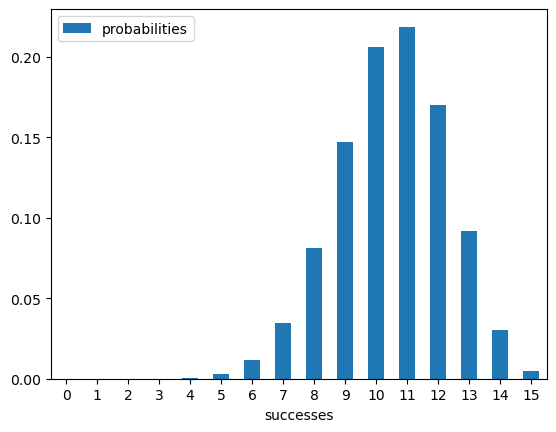

In [7]:
df = pd.DataFrame({'successes':binom.keys(),'probabilities':binom.values()})
df.plot.bar(x='successes',y='probabilities',rot=0)

This is very cool. Now we have the theoretical probability distribution plotted as well as the simulated probability distribution above. We can see by eye whether there's a lot of variation in the simulated probability distribution. As $N,$ the number of trials in our experiment, increases, this variation decreases and our simulated probabilities become closer and closer to the theoretical probabilities which generated the model. For this to be true however we need to keep the number of tosses $n$ in a trial constant (or at least make it grow slower than $N$).

One way to think about this is that we are estimating a $n$ parameter model with $N$ samples. The $n$ parameter model is the probability distribution $(p_0,\dots,p_n)$ where $p_i = \mathbf P (\text{$i$ successes in $n$ trials}).$ It has $n$ parameters instead of $n$ because of the constraint $p_0+\cdots + p_n = 1.$ In reality the family of models is generated by just two parameters, which is the probability $p$ of success for a single trial and the number of trials $n.$ This allows it to be approximated by another famous two-parameter family of models which is the normal distribution (parametrized by its mean and variance). However, we could have been handed our results without being told they come from a binomial distribution. In other words, we might not know what the event $10$ even represents: we may just get a list of numbers and their frequency in the data. A priori it could be that these are rolls of a die, which has a very different distribution (a uniform distribution).

### Approximating other probability distributions with coin flipping models

In fact, here is a very interesting problem along these lines. Coin flipping is very interesting because it is likely universal in the following sense: every probabilistic model can be approximated arbitrarily well by a coin flipping model with sufficiently large $n$ and $N,$ provided we have flexibility to choose the events in question. In the above example we chose our events as "Number of successes". However, we may also ask for combinations of these events, which get us different probabilities. We may then ask what is the *simplest* coin flipping model which approximates a given probabilistic model.

Let's take an example to make this idea concrete, which is the roll of a $n$-sided fair die. The probability distribution in question is the uniform distribution on $n$ states, i.e., the distribution $(p_1,\dots,p_n)$ for which $p_i = 1/n.$ Let's start with $n=3.$ How can we choose events which are comprised of coin flips to approximate a probability distribution of $(1/3,1/3,1/3)$? 

Note if $n= 2^m$ this is very simple, because we toss a fair coin $m$ times and record the results in sequence. Each sequence has probability $1/2^m$ of occurring. In fact, we can take this one step further by labeling any of our sequences. If $k_1 + \cdots + k_\ell = 2^m,$ we can label $k_i$ of our sequences with the outcome $i$ for $i=1,\dots,\ell.$ The probability of outcome $i$ is then $k_i 2^{-m}.$ So we can in fact simulate any distribution $(p_1,\dots,p_\ell)$ which has each $p_i$ an integer multiple of $2^{-m}.$ In fact the binomial distribution is one such example, with $k_i$ equal to a binomial coefficient.

From this we see that we can approximate the distribution $(1/3,1/3,1/3)$ arbitrarily well with a coin flipping model, but we cannot exactly replicate it. This is basically because $1/3$ has an infinite binary decimal expansion (if the probabilities $p_i$ have finite binary expansion they are exactly replicable by the coin tossing model). I wonder if this is what a computer does when it generates a random number from this distribution. To generate the approximating model of length $m$ we should choose all sequences $(x_1,\dots,x_m)$ with $x_i\in \{0,1\}$ such that $\Sigma x_i 2^{-i}\leq 1/3$ to be labeled $1,$ all sequences with the sum in $(1/3,2/3]$ to be labeled $2,$ and all sequences with the sum in $(2/3,1]$ to be labeled $3.$ Then we will get to within $2^{-m}$ precision of the desired distribution.

In keeping with the spirit of this notebook, let's do a simulation!

In [8]:
def trial(m=10):
    trial = {}
    for i in range(m):
        trial[i] = rng.integers(0,2)*math.pow(2,-i-1)
    return trial

M=10000
m=10
p=[0,0,0]

t = trial(m).values()
print(t,sum(t))

for i in range(M):
    s = sum(trial(m).values())
    if s<=0.3333:
        p[0]+=1
    elif s<=0.6666:
        p[1]+=1
    else:
        p[2]+=1

for i in range(0,len(p)):
   p[i]=p[i]/M

print(p)
print(sum(p))

dict_values([0.5, 0.0, 0.125, 0.0625, 0.03125, 0.0, 0.0, 0.0, 0.001953125, 0.0009765625]) 0.7216796875
[0.3329, 0.3397, 0.3274]
1.0


It works fairly well and for trial length $m=10$ and number $M=10,000$ trials we get fairly close though it doesn't seem to be within $2^{-10}.$ This is probably because there are two sources of error: one is the error between the theoretical probability of each state in the model and $1/3,$ which error is as small as $2^{-10},$ and the other is the error between the estimated probability as the frequency of each state in the sample divided by the total sample size $M.$ This latter error is decreasing with $M$ but is much larger and is likely on the order of $1/\sqrt{M}$ by the typical central limit theorem-style argument. Fortunately we have a calculator handy and can compute this to see it is about 0.01 for $M=10,000.$

In [9]:
math.pow(M,-1/2)

0.01

Now in the course of creating this simulation I discovered an important *programming* lesson, which is that when we wish to use the same random number more than once (say, in a series of tests on the number) then we must take care to define a variable which holds that random number value. Here I initially made the mistake of calling a new random trial for each test whether $\Sigma x_i 2^{-i} \leq 1/3$ and whether $\Sigma x_i 2^{-i}\leq 2/3,$ which meant I was estimating the wrong distribution. In fact, what I was getting is an estimate of the distribution $(1/3,2/3\times 2/3,1-1/3-2/3\times2/3) = (1/3,4/9,2/9)$:

In [10]:
[1/3,4/9,2/9]

[0.3333333333333333, 0.4444444444444444, 0.2222222222222222]

There is another method of simulating the uniform distribution $(1/3,1/3,1/3)$ using coin flips which performs the simulation exactly (no error arising from the theoretical difference in the distributions). This is called rejection sampling. To do it we simply toss a coin twice but discard one of the four possible outcomes and repeat the experiment if we receive that outcome. So for example if we get $HH$ we discard it, but if we get any of $HT,TH,TT$ we keep it and we regard the latter three outcomes as our three states. So we will have to re-toss $25\%$ of the time but we get an exact distribution painlessly.

### A simple "poker" game

I asked Alex today if we can play poker using a quarter, and he said yes. I asked him how and he thought for a minute and intuitively came up quickly with the rejection sampling answer: you flip a coin 6 times to get 64 possible sequences, and then you discard 12 of them (if you toss one of these 12, you simply toss again). We didn't think about it in the call, but you have to do the same thing to draw cards without replacement since there's no way to avoid flipping the same sequence again.

I did mention on the call that you would actually need a third person to play this game, because you need someone to record all the flips because unlike with cards the information is lost once it has happened and we need to trust in the outcomes. This third person would need to flip in secret and then reveal the next sequence to both players in order to deal with the drawing without replacement issue, because otherwise we would see the other player's cards by knowing which sequences have been discarded to avoid replacements. It is in fact interesting to think about just how "computationally complex" this game of poker becomes, in that we need to perform a large number of experiments and we need to devise ways of hiding information from some parties. From this perspective cards are a remarkable time and labor saving device and also preserve greater trust more easily.

My interest in modeling poker using coin tosses is not to create a complicated version of poker. I have two aims. First, I was interested in the theorem, which we've already demonstrated, that every probability measure can be approximated arbitrarily well with tosses of a fair coin (or likely any unfair coin as well). The second aim, which I hope to treat in this section, was to actually create a simpler version of poker in which some of the strategy remains but which is as easy as possible to understand.

One of the most interesting things about poker to me is that it is a solvable game, that is, there is an optimal playing strategy which cannot be exploited by any other player's strategy. Of course this optimal strategy is very difficult to identify and implement (this difficulty would be interesting to quantify), and it is hard to build intuition for the optimal rules because of poker's complexity. I've also heard it said among online poker players on forums that the optimal strategy may also not be wealth-maximizing because if other players have suboptimal strategies then there may be better ways of exploiting them (as an extreme example, a player could choose to always fold when confronted with a different player going all in, regardless the size of the all in bet, provided it prompts a call from them, in which case the wealth-maximizing strategy would be to always go all in whenever facing this player heads up and whenever doing so would require them to bet; intuitively this cannot be the optimal strategy because it is contingent on behavior of the other player and therefore is not a universal algorithm that applies to a particular decision irrespective of when in time or whom that decision is against, though it's hard for me to verify that this is indeed characteristic of the optimal strategy).

The very idea that there exists at any decision point an essentially unique choice for this optimal strategy is hard for me to intuitively grasp and agree with. Of course I wish to read Nash's paper on game theory, which will help me understand this at a theoretical level and avoid erroneous thinking. I actually find this aspect of poker encouraging. A foot race is a different zero sum game. But a foot race is not a game of decision-making, it is a game of ability and ultimately a test of which participant has greater ability. Since humans vary significantly in their physical capacity, it seems an unlevel playing field. You can argue the same of poker, and perhaps I'm biased because I obviously enjoy intellectual pursuits, but my feeling is that if we as a society really wanted to for some odd reason we could inculcate most people with enough of the optimal poker strategy by mere drill to avoid them being exploited and actually create something like a true match of equals. This may be untrue however just given computational complexity of this particular game, but it is almost certainly true in simpler games like the ones I hope to devise.

I also have a series of other questions I would like to answer about poker and the optimal strategy, such as what variance should a player expect in their winnings over time due to mere randomness if playing by the optimal rule. All of these questions would be a great deal easier to answer with a simpler game which I then hope to build on to arrive at actual poker.

On the phone we came up with a very simple version of coin poker which I think gets rid of a lot of the difficulty as follows. There are two players. Each flips a coin in secret and records the result (we ignore the issue of verifying the result which can be got around by including a third party "dealer"). Then a coin is flipped in public. Now we still need to define betting for this game and we wish to do so in a way that makes it interesting but is also as simple as possible. We consider the game interesting if the optimal strategy is not purely prescriptive but requires an element of randomness in the player's decisionmaking to avoid being exploited.

Let us start simple and see where we need to add complexity. Simpler is fewer rounds of betting, and rounds of betting in which you cannot raise but can only bet or call. Next we allow raises but in set increments, and next we allow continuum betting. Then we allow more rounds of betting. The possible timing for rounds of betting in this game are before the "flop", i.e., the public toss, or after the flop. Any additional rounds of betting before or after the flop and before revealing hands would be superfluous because there is no material change in information available to the players (unlike real Texas hold em poker, knowing your secret "hand" in this game has no informative value before the flop), and rounds of betting after revealing hands is uninteresting because players have full information.

*Single round betting before flop.* Start with a single round of betting which takes place before the "flop", i.e., the public toss. This is uninteresting because there is no optimal strategy. The game becomes the same as betting on a coin toss. This does not change if we allow raises or continuum betting and raising.

*Single round betting after flop with bet-call only.* Next do a single round of betting but after the flop and before the players reveal their "hands." Suppose first it's a simple bet-call rule with no raising allowed. This is also uninteresting because the optimal strategy is to simply bet as much as possible whenever the player has a match and to never bet otherwise. Indeed, suppose you have a match. Then when you bet you win every time the other player calls or raises and does not have a match, and you keep your bet if the other player calls and does have a match. So there's no way to lose money and the possibility of gaining money when you bet, and therefore you should bet as much as possible. Suppose on the other hand you do not have a match. An optimal player will never bet or call in this case because there is no way to make money and it is only possible to lose money.

*Single round betting after flop with bet-call-raise.* Now let's say it's the same single round of betting but now we are allowed to raise once after a bet. The optimal strategy remains to bet as much as possible if you have a match and to not bet at all if you do not have a match. The case when you have a match is the same. If an optimal player does not have a match the optimal strategy remains the same, but it's trickier to see that this is true because there are now scenarios in which a player could still gain (for example: player bets without a match, opponent raises without a match, player re-raises, and opponent folds). Intuitively we sense that these scenarios are far-fetched and the player should not bet. But how can we be certain? The answer is to notice that a player cannot be exploited if they do not bet without a match: if a player always bets as much as possible with a match and never bets at all without a match, then their expected value must be nonnegative because they can never lose and can possibly gain. Since it's a zero sum game, this must be the optimal strategy and against an optimal opponent using the same strategy we indeed see the expected value of either player is zero, while against a suboptimal opponent their expected value must be positive.

The optimal strategy in this game is prescriptive so it is not interesting according to the criterion we have previously laid out. However, it is interesting in that it already allows us to see whether an optimal strategy is wealth maximizing against a suboptimal player. The answer is negative in some cases but could be affirmative. Suppose we have a very suboptimal player who only and always bets when they do not have a match and subsequently folds to any raise. This suboptimal player can never make money and yet they will lose less to an optimal player than to a player who simply raises them at every opportunity. So the wealth-maximizing strategy against this suboptimal player is indeed different from the optimal strategy. A simulation would help to see how much faster the wealth-maximizing strategy gains.

In [11]:
#define a function which returns the privately known outcomes for 2 players as a dictionary indexed on the players
def game(player_1,player_2):
    player_1_private = rng.integers(0,2)
    player_2_private = rng.integers(0,2)
    flop = rng.integers(0,2)
    
    outcomes = {}
        
    if player_1_private == flop and player_2_private == flop:
        outcomes[player_1] = 'match'
        outcomes[player_2] = 'match'
    elif player_1_private == flop and player_2_private != flop:
        outcomes[player_1] = 'match'
        outcomes[player_2] = 'no match'
    elif player_1_private != flop and player_2_private == flop:
        outcomes[player_1] = 'no match'
        outcomes[player_2] = 'match'
    else:
        outcomes[player_1] = 'no match'
        outcomes[player_2] = 'no match'
    
    return outcomes

N=2000 #number of rounds of the game
W_wealth_maximizing = [1000,1000] # initial wealths of players 1 and 2 respectively
W_optimal = [1000,1000]

for x in range(N):
    if game(1,2)[2]=='no match':
        if W_wealth_maximizing[0]>0 and W_wealth_maximizing[1]>0:
            W_wealth_maximizing[0]+=1
            W_wealth_maximizing[1]-=1
    if game(1,2)[1]=='match' and game(1,2)[2]=='no match':
        if W_optimal[0]>0 and W_optimal[1]>0:
            W_optimal[0]+=1
            W_optimal[1]-=1

print(W_wealth_maximizing)
print(W_optimal)

[1936, 64]
[1527, 473]


We see in this simulation that the optimal strategy is indeed slower. If the initial wealth of each player is 1,000 and the bet size is 1, then after around 2,000 rounds a wealth-maximizing player 1 has emptied the pockets of our suboptimal player 2. However, the optimal player 1 has left about 500 bets on the table. This is a lesson in risk and reward. The optimal player is not exploitable, but protecting oneself comes at a cost.

We don't actually need a simulation to figure out the difference in rates. The wealth-optimizing player wins whenever her opponent does not have a match. The optimal player wins when her opponent does not have a match and she does have a match. Since outcomes for the two players are independent in this game and each player has a 50% chance of having a match, we see the optimal player should win 50% as often as the wealth-maximizing player. The expected value for the wealth-maximizing player is twice as large.

#### Interesting philosophical implications

There is a possible philosophical implication of our risk-reward lesson. In our game there are only two players and the expected value of a strategy is independent of the size of the player's total wealth. Imagine a game in which there are more players and in which the expected winnings of a wealth-maximizing strategy increase with the player's total wealth. In such a situation, players who use an optimal strategy will avoid exploitation but will not be among the rich. Instead, one can imagine three "classes" of players: the very wealthy who employ wealth-maximizing strategies, the very poor who employ the opposite of wealth-maximizing strategies, and the moderately wealthy who employ optimal strategies. The very rich and the very poor are flip sides of the same coin in such a game. In our above example, the suboptimal and wealth-maximizing player strategies are also fixed so that the suboptimal player never reacts to the wealth-maximizing player's exploitation. 

However, in real life we expect the suboptimal player eventually to turn the tables. We can imagine this in our game as follows: suppose the wealth-maximizing player sets up a computer to automatically run her strategy and ignores the actions of the suboptimal player. Then the suboptimal player, after taking a lot of punishment, wakes up one round and decides that her strategy is not working and it's time for a change. They wish to exploit their algorithmic opponent as much as possible. We can assume the algorithmic strategy is implemented in such a way as to minimize risk in case the suboptimal player deviates from their strategy. This would require the algorithm to fold in case of a re-raise from the suboptimal player if and only if the algorithmic player does not have a match. In this case the game becomes very interesting for the suboptimal player. If the suboptimal player has a match they should of course re-raise in every case. If they do not have a match, there are two cases. If the opponent has a match they wish not to bet. If the opponent does not have a match, they would like to bet and re-raise. Each possibility has 50% probability. If opponent has a match they lose 3 bets to find out. If opponent does not have a match they gain 2 bets. So the expected value of betting in case of no match is -0.5 and they should not do it. Thus the optimal strategy is wealth-maximizing against the algorithmic player. Now in a more complex game we can imagine that the algorithmically wealth-maximizing strategy could be maximally exploited by a different strategy which is not the optimal strategy. Then by switching to the maximally exploitative strategy the very poor become the new rich :)

This prompts a theoretical definition. A given algorithmic suboptimal strategy $S_1$ determines a maximally exploitative strategy $S_2$ which minimizes risk among all maximally exploitative strategies (requires proof and definition of "risk"). If this maximally exploitative strategy $S_2$ is itself suboptimal, it determines a new maximally exploitative strategy $S_3$, and so on. If the strategy $S_i$ is optimal for some $i,$ then the maximally exploitative strategy is just the optimal strategy $S_o.$ Now we ask: Does the sequence $S_i$ necessarily converge to $S_o$ and under what conditions is this true? When does it converge in a finite number of steps? Is it possible to have oscillation between suboptimal exploitative strategies? We can use this sequence to define a "distance" from the optimal strategy as the number of iterations required to either converge to $S_o$ or to arrive at a strategy which has expected loss $>-\varepsilon$ against $S_o$ for some fixed $\varepsilon>0.$

These questions have fascinating implications for the "class system" of the games they describe. For example, do we expect the very rich and the very poor to be a rotating set of players who are reacting to each other in a maximally exploitative way and independently of the optimal players? This is the cyclical case in which there is no convergence to an optimal strategy. Or do we conversely expect that all players in the game will converge eventually to the optimal middle? Which is a better description of the economic world in which we live?

There are several other more ambiguous questions that this suggests. One is around the time interval required for each iteration: How long can we expect that a player will be exploited before learning how they are being exploited? For example, we may expect that if players who don't figure out they're being exploited within a particular time horizon end up out of the game which puts some constraint on how long an exploitative strategy can work. Another line of questioning is around whether the use of wealth-maximizing strategies can actually change the optimal strategy in some cases, for example, where total wealth actually affects the probability of winning and not only the expected value so that winning too slowly becomes exploitable. Is it possible to construct a multi-player game in this way so that the optimal strategy is actually determined by the presence of suboptimal players and the money they "put on the table"? Even aside from this situation we have an interesting possibility that volatility may increase in the presence of suboptimal players and the exploitative suboptimal strategies that they facilitate.

#### Revisiting the optimal strategy: the case of antes

The sequence of exploitative strategies $S_i$ also has a very practical implication as it gives a potential way for us to discover the optimal strategy in complicated games by starting with a suboptimal strategy defined algorithmically, then finding a risk-minimizing wealth-maximizing opposing strategy, and continuing along these lines. To apply this, let's revisit our simple game and change it slightly to require an ante before the post-flop betting round. We'll start with the simple case where both players have paid 1 to stay in the game. Now we'll look for a sequence of strategies $S_i$ which converge to the optimal strategy.

For our starting strategy $S_1,$ we will take the optimal strategy of the game with no ante which maximizes wealth against suboptimal players (because note that not betting at all was optimal for the game with no ante): the $S_1$ player bets as much as possible when they have a match, and does not bet or folds when they do not have a match. In the new game, this strategy is exploitable because the player is willing to forfeit money already in the pot when they do not have a match. We define the $S_2$ strategy to exploit this while minimizing risk, as follows. The opponent of the $S_1$ player bets whenever they know that the $S_1$ player does not have a match, whether this opponent has a match or not. So if the $S_1$ player is first to bet and does not bet, the opponent knows they do not have a match and bets, inducing the $S_1$ player to fold. To minimize risk the $S_2$ player folds at any re-raise unless they have a match, in which case they play exactly as the $S_1$ player and bet as much as possible.

We have to check that this is wealth-maximizing by dealing with the case when the $S_2$ player is first to bet. Should they bet here or fold if they do not have a match? Suppose they bet $x.$ They have a 50% chance of winning the bet (chance their opponent does not have a match). If they win they gain $2$ and otherwise they lose $x.$ So the expected value of betting is $50\%\times (2-x)$ and they should bet if $x<2$ but should plainly make $x$ as small as possible. We will take $x=1$ as the smallest allowed bet. The wealth-maximizing strategy in this case has some probability of losing against $S_1.$

So in sum: $S_2$ always bets $1$ if no one has yet bet, and always bets as much as possible when they have a match, and otherwise folds.

Now the $S_3$ player needs to exploit the $S_2$ player while minimizing risk. One free way to exploit the $S_2$ player is to induce them to reveal more information: the $S_3$ player will never bet first if they have a match, but will wait for the $S_2$ player to bet which induces the $S_2$ player to bluff in some cases when the $S_3$ player secretly has a match in which case the $S_3$ player can raise as much as possible.

What happens when the $S_2$ player bets first and the $S_3$ player does not have a match? If the $S_2$ player bets $1$ only when they have no match and otherwise bets their full wealth, the $S_3$ player can exploit this information to selectively choose when to bet. But let's first assume bet sizes are capped at $1.$ The $S_3$ player should clearly not call so we need to know what is expected value of raising $1.$ The current pot is $2+1 = 3,$ which is the gain when the $S_2$ player folds 50% of the time. The loss when the $S_2$ player re-raises 50% of the time is $2.$ So the expected value is $50\%\times (3-2) = 0.5>0$ and the $S_3$ player should raise. To minimize risk the $S_2$ player checks if their opponent is first to bet and checks.

The remaining case is when the $S_3$ player does not have a match and they are first to bet. Should they bet or check-raise? The expected value of betting against $S_2$ is $50\%\times (2-1) = 0.5>0.$ If they check then $S_2$ is sure to bet, so they get the same expected value of $0.5$ by check-raising. Thus the two options are equivalent from a wealth-maximization standpoint. There are two ways to minimize risk, which illustrates the ambiguity in this risk-minimization requirement. One is to reduce volatility (variance) against $S_2$ which counsels $S_3$ to bet first rather than check-raise, which also minimizes risk of exploitation by a different strategy which merely checks with a no match rather than betting to avoid exploitation. The other is to reduce information available to the other player, which counsels $S_3$ to check-raise in order to behave the same with a non-match as with a match. We choose to mask with the intuitive rationale that this is less exploitable than the variance minimizing but information leaking strategy of betting first.

So in sum: $S_3$ never bets first but always raises once when $S_2$ bets. To minimize risk they always fold after their raise unless they have a match in which case they bet as much as possible.

To exploit this $S_4$ can bet only with a match and otherwise check-fold. Against $S_3$ then, $S_4$ will induce a raise only when it has a match and will gain $3$ in case $S_3$ does not have a match and it does, which happens $25\%$ of the time. Another $50\%$ of the time there is a tie, and another $25\%$ of the time $S_4$ loses only the ante. So the overall expected value for $S_4$ vs $S_3$ is $25\%\times (3-1) = 0.5.$

Against $S_4,$ we can use a strategy $S_5$ which plays passively if it is first to act but if it is second to act it always bets if $S_4$ has checked. Here $S_5$ is exploiting the fact that $S_4$ has revealed information about whether it has a match or not. So in the $50\%$ of the time when $S_5$ is second to act, it wins the $50\%$ of the time when $S_4$ does not have a match and in this case just wins the antes. So the expected value is $25\% \times 1 = 0.25.$

To exploit $S_5,$ a strategy $S_6$ can check-raise if first to act and keep betting with a match only if second to act. Then $S_7$ simply plays passively if first to act and bets with a match if second to act.

#### Improving our simulation

I would like to improve our simulation and think through a little more carefully how it can be implemented. I would like to define a "strategy" as an input to a game, and I would like to be able to play the game as well and to play against various strategies that I define. Once we figure out how to implement this I would then like to run some simulations to understand the variance in winning with different strategies. But for now I want to focus on coding the game itself.

The game should take as inputs a strategy and wealth for player 1 and a strategy and wealth for player 2. Clearly the final output should be an updated wealth for player 1 and an updated wealth for player 2, which wealths encode the outcome of the game as player 1 wins, player 2 wins, or tie. We may also wish to output the outcome of the game in more detail, such as asking whether one of the players folded to understand the proportion of times this happens. My guess is that these outputs will be easy to generate once we form the basic structure of the game, which is where we will start.

What should a "strategy" be? We wish for one potential strategy to be generated by prompts to the user who then inputs their decision. Otherwise what we need is a decision at every decision-point in the game, in other words a mapping from decision-points to decisions. Since there are finitely many decision-points in a game with finite wealth, this is effectively an $n$-tuple of decisions indexed by the decision-points. To put it very precisely, we enumerate the decision-points as $1,\dots,n$ and then to each decision point we assign a value $d(n,i)$ which corresponds to player $i$'s decision at the $n$th decision-point. The possible values of this decision are fold, check, call, bet, raise. There is likely a way that we can map these decision values to numbers, but first let's think about what the decision depends on because it is not only dependent on the decision point but also on the state of the game at that time.

The decision $d(n,i)$ is a function of all previous decisions as well as information available to the player on their own hand, which in this game is just whether they have a match or not, as well as each player's total wealth. So to truly access all possible strategies in the game, we need to record all of these decisions and create a decision tree. I keep thinking the right structure are nodes of a graph.

**20230801** I decided I'm just going to start by programming a simple game that I can actually play. Then I'll see what the inputs are. I also realized that the "flop" coin toss doesn't matter for this game so we can just have the players toss in secret and declare a hand a winner if it's heads.

In [131]:
import pyinputplus as pyip

def player_1_strategy(game,wealth,bet=0):
    if game[1]=='match' and bet>0:
        print("Player 1 calls your bet.")
        return ('call',bet)
    elif game[1]=='match':
        print("Player 1 checks.")
        return ('check',bet)
    elif game[1]=='no match':
        player_1_decision = rng.integers(0,3)
        if player_1_decision == 0 and bet>0 and wealth[-1][0]>bet:
            bet_1 = rng.integers(min(bet+1,wealth[-1][0]),wealth[-1][0]+1)
            print("Player 1 raises to "+str(bet_1)+".")
            return ('raise',bet_1)
        elif player_1_decision == 0 and wealth[-1][0]<bet:
            print("Player 1 calls with "+str(wealth[-1][0])+".")
            return ('call',wealth[-1][0])
        elif player_1_decision == 0:
            bet_1 = rng.integers(min(bet+1,wealth[-1][0]),wealth[-1][0]+1)
            print("Player 1 bets "+str(bet_1)+".")
            return ('bet',bet_1)
        elif player_1_decision == 1 and bet>0:
            print("Player 1 calls your bet.")
            return ('call',min(bet,wealth[-1][0]))
        elif player_1_decision == 1 or (player_1_decision == 2 and bet == 0):
            print("Player 1 checks.")
            return ('check',min(bet,wealth[-1][0]))
        elif player_1_decision == 2 and bet>0:
            print("Player 1 folds.")
            return ('fold',0)

def input_prompts(pot,bet,game,p1_move,wealth):
    if p1_move[0] == 'fold':
            wealth.append((wealth[len(wealth)-1][0]-pot,wealth[len(wealth)-1][1]+pot))
            print('You win this round. Your wealth is now '+str(wealth[len(wealth)-1][1])+'.')
    elif p1_move[0] == 'check':
        print("Your outcome is "+ str(game[2])+", and total pot size is "+str(2*pot)+".")
        check = pyip.inputYesNo('Would you like to check? ')
        if check == 'no':
            bet = pyip.inputNum('How much would you like to bet? ',min=min(1,wealth[len(wealth)-1][1]-pot),max=wealth[len(wealth)-1][1]-pot)
            p1_move = player_1_strategy(game,wealth,bet)
            input_prompts(pot,bet,game,p1_move,wealth)
        if check == 'yes':
            if game[1] == 'match' and game[2] == 'no match':
                wealth.append((wealth[len(wealth)-1][0]+pot,wealth[len(wealth)-1][1]-pot))
                print('Player 1 has a match and wins this round. Your wealth is now '+str(wealth[len(wealth)-1][1])+'.')
            elif (game[1] == 'match' and game[2] == 'match') or (game[1] == 'no match' and game[2] == 'no match'):
                pot = 0
                wealth.append((wealth[len(wealth)-1][0]-pot,wealth[len(wealth)-1][1]+pot))
                print('You have tied with player 1 and split the pot. Your wealth is still '+str(wealth[len(wealth)-1][1])+'.')
            elif game[1] == 'no match' and game[2] == 'match':
                wealth.append((wealth[len(wealth)-1][0]-pot,wealth[len(wealth)-1][1]+pot))
                print('Player 1 does not have a match and you win this round. Your wealth is now '+str(wealth[len(wealth)-1][1])+'.')
    elif p1_move[0] == 'call':
        pot = pot + bet
        if game[1] == 'match' and game[2] == 'no match':
            wealth.append((wealth[len(wealth)-1][0]+pot,wealth[len(wealth)-1][1]-pot))
            print('Player 1 has a match and wins this round. Your wealth is now '+str(wealth[len(wealth)-1][1])+'.')
        elif (game[1] == 'match' and game[2] == 'match') or (game[1] == 'no match' and game[2] == 'no match'):
            pot = 0
            wealth.append((wealth[len(wealth)-1][0]-pot,wealth[len(wealth)-1][1]+pot))
            print('You have tied with player 1 and split the pot. Your wealth is still '+str(wealth[len(wealth)-1][1])+'.')
        elif game[1] == 'no match' and game[2] == 'match':
            wealth.append((wealth[-1][0]-pot,wealth[-1][1]+pot))
            print('Player 1 does not have a match and you win this round. Your wealth is now '+str(wealth[-1][1])+'.')
    elif p1_move[0] == 'bet' or p1_move[0] == 'raise':
        pot = pot + bet
        fold = 'no'
        if int(wealth[-1][1])-int(pot) == 0:
            if game[1] == 'match' and game[2] == 'no match':
                wealth.append((wealth[-1][0]+pot,wealth[-1][1]-pot))
                print('Player 1 has a match and wins this round. Your wealth is now '+str(wealth[-1][1])+'.')
            elif (game[1] == 'match' and game[2] == 'match') or (game[1] == 'no match' and game[2] == 'no match'):
                pot = 0
                wealth.append((wealth[-1][0]-pot,wealth[-1][1]+pot))
                print('You have tied with player 1 and split the pot. Your wealth is still '+str(wealth[-1][1])+'.')
            elif game[1] == 'no match' and game[2] == 'match':
                wealth.append((wealth[-1][0]-pot,wealth[-1][1]+pot))
                print('Player 1 does not have a match and you win this round. Your wealth is now '+str(wealth[-1][1])+'.')
        elif p1_move[0] == 'bet':
            fold = pyip.inputYesNo('Your outcome is '+ str(game[2])+', and total pot size is '+str(2*pot)+'. Would you like to fold? ')
        elif p1_move[0] == 'raise':
            fold = pyip.inputYesNo('Would you like to fold? ')
        
        minBet = p1_move[1]-bet
        if fold == 'no' and wealth[-1][1]-pot>0:
            bet = pyip.inputNum('How much would you like to bet? ',min=min(int(minBet),wealth[len(wealth)-1][1]-pot),max=int(wealth[-1][1]-pot))
            pot = pot + min(bet,minBet)
            if bet <= minBet:
                print('You call.')
                if game[1] == 'match' and game[2] == 'no match':
                    wealth.append((wealth[len(wealth)-1][0]+pot,wealth[len(wealth)-1][1]-pot))
                    print('Player 1 has a match and wins this round. Your wealth is now '+str(wealth[len(wealth)-1][1])+'.')
                elif (game[1] == 'match' and game[2] == 'match') or (game[1] == 'no match' and game[2] == 'no match'):
                    pot = 0
                    wealth.append((wealth[len(wealth)-1][0]+pot,wealth[len(wealth)-1][1]-pot))
                    print('You have tied with player 1 and split the pot. Your wealth is still '+str(wealth[len(wealth)-1][1])+'.')
                elif game[1] == 'no match' and game[2] == 'match':
                    wealth.append((wealth[len(wealth)-1][0]-pot,wealth[len(wealth)-1][1]+pot))
                    print('Player 1 does not have a match and you win this round. Your wealth is now '+str(wealth[len(wealth)-1][1])+'.')
            elif bet > minBet:
                p1_move = player_1_strategy(game,wealth,bet)
                input_prompts(pot,bet,game,p1_move,wealth)
        elif fold == 'yes' and wealth[-1][1] - pot>0:
            wealth.append((wealth[len(wealth)-1][0]+pot,wealth[len(wealth)-1][1]-pot))
            print('You fold and player 1 wins. Your wealth is now '+str(wealth[len(wealth)-1][1])+'.')
            
        return wealth
        
def gameplay(wealth,ante,first_to_act,game):
    pot = ante
    
    if first_to_act == 1:
        print("Your outcome is "+ str(game[2])+", and total pot size is "+str(2*pot)+". You are first to act.")
        bet = pyip.inputNum('How much would you like to bet? ',min=0,max=player_2_wealth-pot/2)
        p1_move = player_1_strategy(game,wealth,bet)
        wealth = input_prompts(pot,bet,game,p1_move,wealth)
    elif first_to_act == 0:
        p1_move = player_1_strategy(game,wealth,0)
        wealth = input_prompts(pot,0,game,p1_move,wealth)
    
    return wealth
            
    
#create a list of 2-tuples that represent the wealth of the players over time

player_1_wealth = 1000
player_2_wealth = 1000

wealth = [(player_1_wealth,player_2_wealth)]

ante = 1

print("Your starting wealth is " + str(wealth[0][1])+". Antes are "+ str(ante)+" per player.")


while wealth[len(wealth)-1][0]>0 and wealth[len(wealth)-1][1]>0:
    game = [0,'match' if rng.integers(0,2)==1 else 'no match','match' if rng.integers(0,2)==1 else 'no match']
    gameplay(wealth,ante,rng.integers(0,2),game)
    print(wealth)
    print('\n')

Your starting wealth is 1000. Antes are 1 per player.
Player 1 checks.
Your outcome is match, and total pot size is 2.
Would you like to check? no
How much would you like to bet? 999
Player 1 calls your bet.
Player 1 does not have a match and you win this round. Your wealth is now 2000.
[(1000, 1000), (0, 2000)]




The foregoing is a bit of a mess and has some errors in case the computer player raises and re-raises. However, for the most part it does the job and generates a somewhat playable game. I've already iterated quite a bit and simplified things. But rather than debug this version of the game, I will start from scratch and re-build it using learnings from this time. Some learnings are as simple as syntax and cleanliness (e.g., using the "-1" index to access the last element of a list, rather than the clunky "len(list)-1"). Others are more logical such as defining the game as a simple list or tuple element rather than a function, which was causing some difficulty and took way too many lines. There are other learnings that I will likely only discover once I rebuild. I anticipate that it may take a few rebuilds before I am really satisfied.

On the actual gameplay, I've created a bot which always calls or checks with a match and effectively makes a random choice between check / folding, betting, raising with no match. This bot is not effective at all and is very easy to beat by simply going all in with every match. Eventually you will catch it calling without a match which is a huge mistake. Once I get the game programmed to my satisfaction, I will create a more optimized bot. In case bets are larger than the pot the bot will play passively. If bets are smaller than the pot the bot will randomly bet or play passively with a probability that makes it impossible to exploit.